In [133]:

import os 
import pandas as pd
import numpy as np
import yfinance as yf
import mplfinance as mpf
import matplotlib.pyplot as plt
import ta
import talib
from statsmodels.tsa.stattools import adfuller
import vectorbt as vbt 


from technical_analysis import *
from ALGO_KT1 import Preprocessing_functions as pf


ticker = "XLU"
df = pf.downlaod_symbol_data(ticker, period = "240mo")
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,open_low,open_close,open_high,high_low,low_close,high_close,gap
Date,,,,,,,,,,,,,,,
2004-06-14 00:00:00-04:00,77.66,77.68,77.01,77.25,34633000,0.00,0.0,0.0,0.836982,0.527942,-0.025753,0.862513,-0.311648,-0.553553,NaN
2004-06-15 00:00:00-04:00,77.72,78.09,77.45,77.80,37445000,0.00,0.0,0.0,0.347401,-0.102934,-0.476068,0.819567,-0.451904,-0.371366,0.608414
2004-06-16 00:00:00-04:00,77.79,77.92,77.58,77.79,26633400,0.00,0.0,0.0,0.269958,0.000000,-0.167117,0.436345,-0.270688,-0.166838,-0.012853
2004-06-17 00:00:00-04:00,77.68,77.83,77.33,77.67,28402400,0.00,0.0,0.0,0.450566,0.012873,-0.193100,0.642426,-0.439674,-0.205576,-0.141406
2004-06-18 00:00:00-04:00,77.57,78.22,77.51,77.82,31799800,0.41,0.0,0.0,0.077349,-0.322290,-0.837953,0.907696,-0.399948,-0.511378,-0.128750


In [134]:

#df = ROC(df)

df = EMA(df)

df = momentum_oscillators(df) ## no vwap 

df = volatility(df)

df = reversal_patterns(df)

df = continuation_patterns(df)

df = magic_doji(df)

df['vwap'] = ta.volume.volume_weighted_average_price(df['High'],
                                                     df['Low'],
                                                     df['Close'],
                                                     df['Volume'])



df['vwap_diff'] = df['Close'] - df['vwap'] # if -ve then VWAP > Close ==> BUY P
df['vwap_pct_diff'] =  (df['vwap_diff']) /  df['Close'].shift(-1)

df = df.dropna()

df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,open_low,open_close,...,tasuki,rf_three_methods,separating_lines,long_legged_doji,gravestone_doji,dragonfly_doji,tristar_doji,vwap,vwap_diff,vwap_pct_diff
Date,,,,,,,,,,,,,,,,,,,,,
2005-03-29 00:00:00-05:00,81.49,82.02,80.87,81.07,71160300,0.0,0.0,0.0,0.760830,0.515401,...,0,0,0,0,0,0,0,82.627915,-1.557915,-0.018948
2005-03-30 00:00:00-05:00,81.24,82.23,81.24,82.22,62002100,0.0,0.0,0.0,0.000000,-1.206302,...,0,0,0,0,0,0,0,82.450529,-0.230529,-0.002809
2005-03-31 00:00:00-05:00,82.22,82.41,82.00,82.06,64575400,0.0,0.0,0.0,0.267575,0.194600,...,0,0,0,0,0,0,0,82.322221,-0.262221,-0.003210
2005-04-01 00:00:00-05:00,82.53,82.78,81.33,81.70,95255300,0.0,0.0,0.0,1.454017,1.005695,...,0,0,0,0,0,0,0,82.195521,-0.495521,-0.006055
2005-04-04 00:00:00-04:00,81.65,81.99,81.22,81.83,71581200,0.0,0.0,0.0,0.526638,-0.220453,...,0,0,0,0,0,0,0,82.096878,-0.266878,-0.003246


In [135]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Capital Gains', 'open_low', 'open_close', 'open_high', 'high_low',
       'low_close', 'high_close', 'gap', 'EMA8', 'EMA20', 'EMA50', 'EMA100',
       'EMA200', 'rsi', 'macd_values', 'macd_signal_line', 'atr', 'bband_up',
       'bband_mid', 'bband_low', 'hammer', 'hanging_man', 'engulfing_pattern',
       'dark_cloud', 'piercing_line', 'morning_star', 'evening_star',
       'shooting_star', 'inverted_hammer', 'harami', 'harami_cross',
       'belt_hold', 'upsidegap_two_crows', 'three_black_crows',
       'three_white_soldiers', 'advance_block', 'stalled_pattern',
       'counterattack', 'tasuki', 'rf_three_methods', 'separating_lines',
       'long_legged_doji', 'gravestone_doji', 'dragonfly_doji', 'tristar_doji',
       'vwap', 'vwap_diff', 'vwap_pct_diff'],
      dtype='object')

In [136]:
stats = pf.dist_stats(df, "vwap_diff")
stats_pct = pf.dist_stats(df, "vwap_pct_diff")
stats_pct

,vwap_pct_diff
count,4837.0000
min,-0.2140
max,0.1020
mean,0.0039
median,0.0068
std,0.0216
skew,-1.8703
kurtosis,11.4422


In [137]:

long_threshold = 0.03
short_threshold = -0.03

df['buy_vwap'] = df['vwap_pct_diff'] >= long_threshold
df['sell_vwap'] = df['vwap_pct_diff'] >= short_threshold


entries = df['buy_vwap']
exits = df['vwap_pct_diff'] < -0.01


#print(entries, exits)

pf = vbt.Portfolio.from_signals(df['Close'], entries, exits,freq="1m" )
print(pf.stats())

#df[df['vwap_pct_diff'] > 0.07].head()

Start                                        2005-03-29 00:00:00-05:00
End                                          2024-06-13 00:00:00-04:00
Period                                                 3 days 08:37:00
Start Value                                                      100.0
End Value                                                   217.980589
Total Return [%]                                            117.980589
Benchmark Return [%]                                        569.113112
Max Gross Exposure [%]                                           100.0
Total Fees Paid                                                    0.0
Max Drawdown [%]                                             30.766995
Max Drawdown Duration                                  0 days 14:04:00
Total Trades                                                        39
Total Closed Trades                                                 38
Total Open Trades                                                    1
Open T

In [138]:
pf.plot().show()

vwap_band_low = 0.1 * (-1)
vwap_band_high = 0.08

profit_low = 0.07 * (-1)
profit_high = 0.06


df['buy_vwap'] = df['vwap_pct_diff'] < vwap_band_low
df['sell_vwap'] = df['vwap_pct_diff'] > vwap_band_high 
df['vwap_strat'] = 0

df['vwap_strat'] = np.where(df["buy_vwap"] == True, 1, df['vwap_strat'])
df['vwap_strat'] = np.where(df["sell_vwap"] == True, -1, df['vwap_strat'])

df.head()

In [139]:
#print(df['vwap_strat'].value_counts())

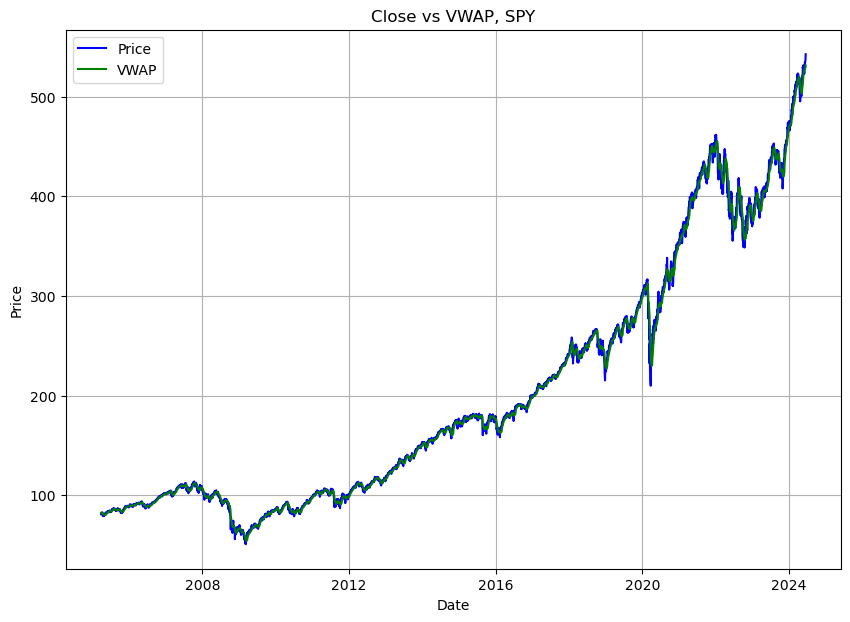

In [140]:
# Create the plot
plt.figure(figsize=(10, 7))  # Set the figure size
plt.plot(df.index, df['Close'], label="Price", color = "blue")
plt.plot(df.index, df['vwap'], label="VWAP", color = 'green')
# Add labels and title
plt.xlabel("Date")
plt.ylabel("Price")
plt.title(f"Close vs VWAP, {ticker}")
# Add legend
plt.legend()
# Show the plot
plt.grid(True)
plt.show()